In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
df = pd.read_csv(r'C:\Users\sarth\OneDrive\Desktop\co2.csv')



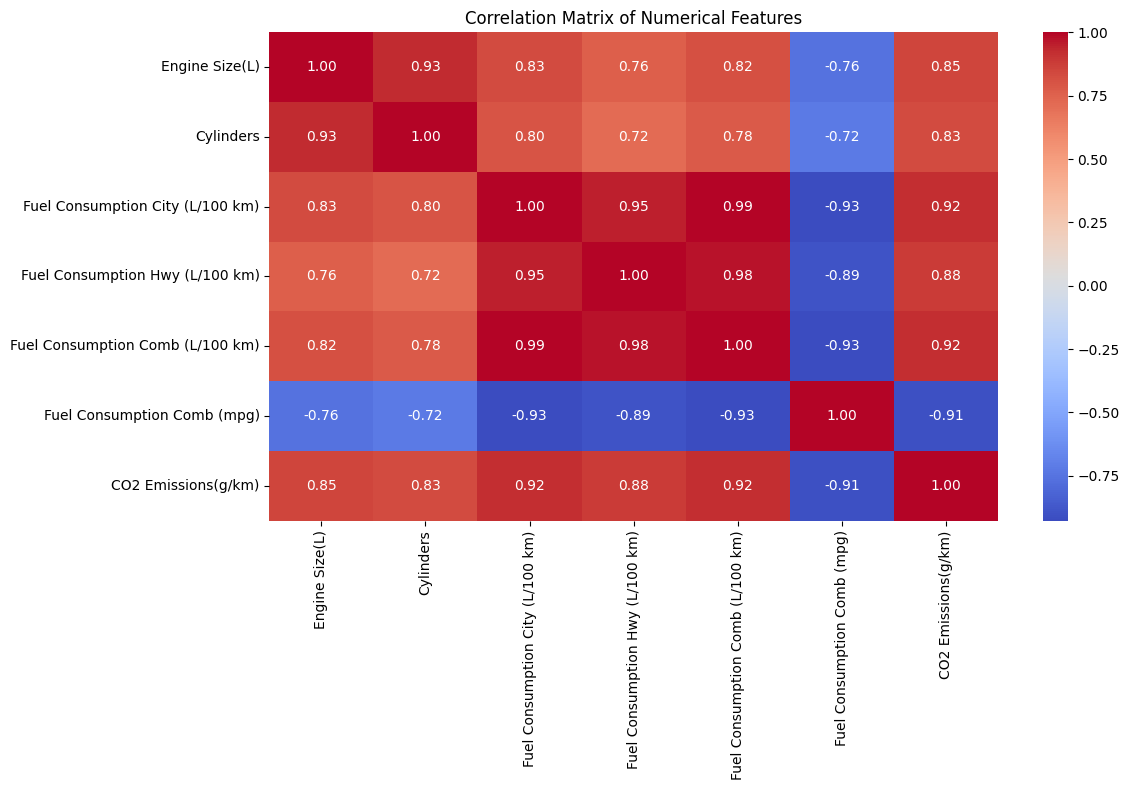

In [48]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [71]:

# Selecting relevant features and the target variable
features = df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]
target = df['CO2 Emissions(g/km)']

# Normalize the features
features_normalized = (features - features.mean()) / features.std()

# Add a bias term (intercept) to the features
features_normalized['Bias'] = 1

# Convert to numpy arrays
X = features_normalized.values
y = target.values

print('Data preparation done.')

Data preparation done.


In [78]:
# Implementing the cost function
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

def compute_cost(X, y, weights):
    m = len(y)  # number of training examples
    predictions = X.dot(weights)  # predicted values
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))  # MSE
    return cost

# Implementing gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        weights -= (learning_rate / m) * (X.T.dot(errors))  # update weights
        cost_history[i] = compute_cost(X, y, weights)  # save cost
    return weights, cost_history

# Initialize parameters
learning_rate = 0.01
iterations = 1000
weights = np.zeros(X.shape[1])  # initialize weights

# Perform gradient descent
weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

# Final cost
final_cost = compute_cost(X, y, weights)
print('Final cost after gradient descent:', final_cost)
# Calculate R-squared value
def r_squared(X, y, weights):
    predictions = X.dot(weights)
    ss_total = np.sum((y - np.mean(y)) ** 2)  # total sum of squares
    ss_residual = np.sum((y - predictions) ** 2)  # residual sum of squares
    r2 = 1 - (ss_residual / ss_total)  # R-squared
    return r2

# Calculate R-squared
r2_value = r_squared(X, y, weights)
print('R-squared value:', r2_value)

Final cost after gradient descent: 217.05711122522555
R-squared value: 0.8731872692077673


In [79]:
# Shuffle the data
np.random.seed(42)  # for reproducibility
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train_manual = X_shuffled[:train_size]
y_train_manual = y_shuffled[:train_size]
X_test_manual = X_shuffled[train_size:]
y_test_manual = y_shuffled[train_size:]

# Initialize weights for the training set
weights_manual = np.zeros(X_train_manual.shape[1])

# Perform gradient descent on the training set
weights_manual, cost_history_manual = gradient_descent(X_train_manual, y_train_manual, weights_manual, learning_rate, iterations)

# Calculate final cost and R-squared for the test set
final_cost_test_manual = compute_cost(X_test_manual, y_test_manual, weights_manual)

# Calculate R-squared for the test set
r2_value_test_manual = r_squared(X_test_manual, y_test_manual, weights_manual)

print('Final cost on test set (manual split):', final_cost_test_manual)
print('R-squared value on test set (manual split):', r2_value_test_manual)

Final cost on test set (manual split): 203.35170846581713
R-squared value on test set (manual split): 0.8856635476911223
